In [69]:
from qiskit import *
from qiskit.visualization import *

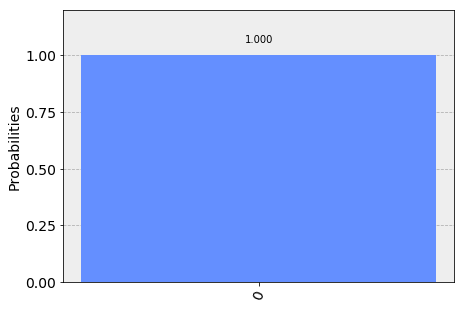

In [93]:
class DustCircuit(QuantumCircuit):
    def __init__(self, n, backend = BasicAer.get_backend('qasm_simulator')):
        self.q = QuantumRegister(n)
        self.c = ClassicalRegister(n)
        self.backend = backend
        self.dict_results = None
        super().__init__(self.q,self.c)    
    def execute(self, nshots = 1000):
        self.result = execute(self, self.backend, shots=nshots).result()
        self.counts = self.result.get_counts(self)
        self.dict_results = {}
        for key in list(self.counts.keys()):
            self.dict_results[int(key,2)] = self.counts[key]
        return self.result
    def execute_statevect(self):
        self.result = execute(self, BasicAer.get_backend('statevector_simulator')).result()
        self.statevector = self.result.get_statevector(self)
        return self.result
    def plot(self, how='histogram'):
        fig = None
        if (how == 'histogram'): fig = \
         plot_histogram(self.dict_results)
        elif (how == 'state_city'): fig = \
         plot_state_city(self.statevector)
        return fig
c = DustCircuit(3)
c.measure(c.q, c.c)
c.execute_s()
c.plot()

In [82]:
int("010",2)

2